In [ ]:
import pandas as pd
df=pd.read_csv("/content/club_games.csv")
print(df)

        game_id  club_id  own_goals  own_position     own_manager_name  \
0       2320450   1468.0        0.0           NaN    Holger Bachthaler   
1       2320454    222.0        0.0           NaN          Volkan Uluc   
2       2320460      1.0        3.0           NaN      Jürgen Luginger   
3       2320472   2036.0        4.0           NaN        Frank Schmidt   
4       2321027     33.0        3.0           8.0          Jens Keller   
...         ...      ...        ...           ...                  ...   
145739  3912717     62.0        0.0           NaN  Jindrich Trpisovsky   
145740  3912732    602.0        0.0           NaN    Vladimir Cheburin   
145741  3912739    540.0        0.0           NaN       Vladimír Weiss   
145742  4031421   2156.0        0.0           NaN      José Luis Oltra   
145743  4188444   1132.0        4.0           NaN      Vincent Kompany   

        opponent_id  opponent_goals  opponent_position opponent_manager_name  \
0              24.0            

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

try:
    df = pd.read_csv("/content/club_games.csv")
    categorical_columns = df.select_dtypes(include=['object']).columns
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    imputer = SimpleImputer(strategy='median')
    df.iloc[:, :] = imputer.fit_transform(df)
    X = df.drop('result', axis=1)
    y = df['result']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000),
        "SVM": SVC(random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
except FileNotFoundError:
    print("Error: club_games.csv not found. Please upload the file to your Colab environment.")
except KeyError as e:
    print(f"Error: Column '{e}' not found in the dataset. Please check your target variable name.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Random Forest Accuracy: 0.9994
Logistic Regression Accuracy: 1.0000
SVM Accuracy: 0.6074
K-Nearest Neighbors Accuracy: 0.5788


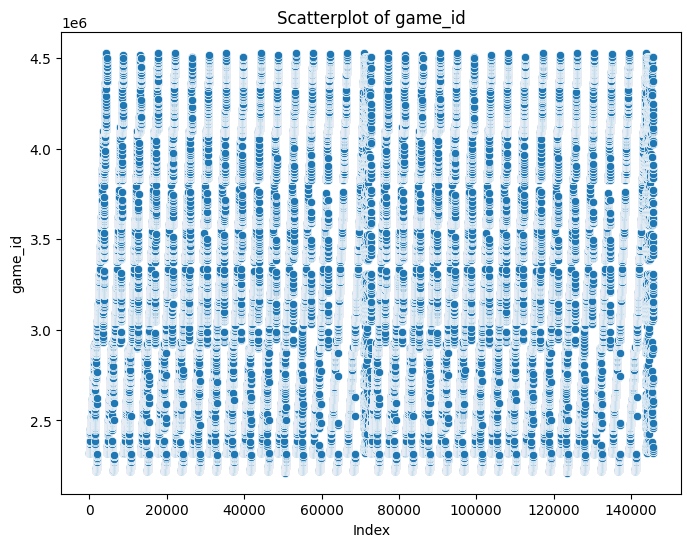

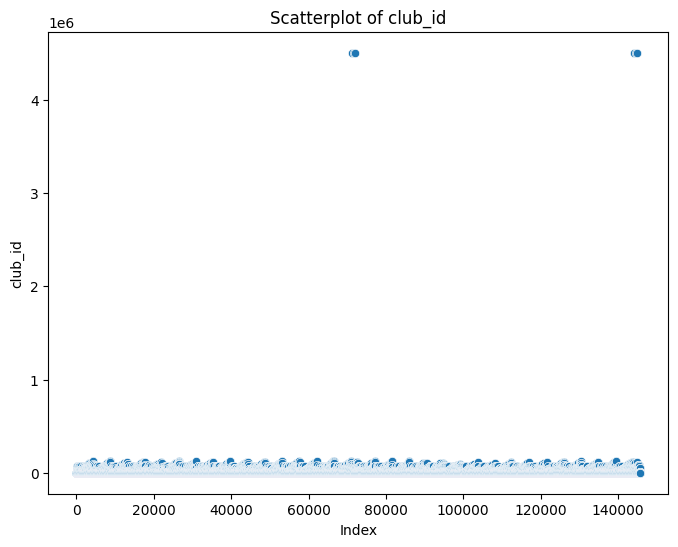

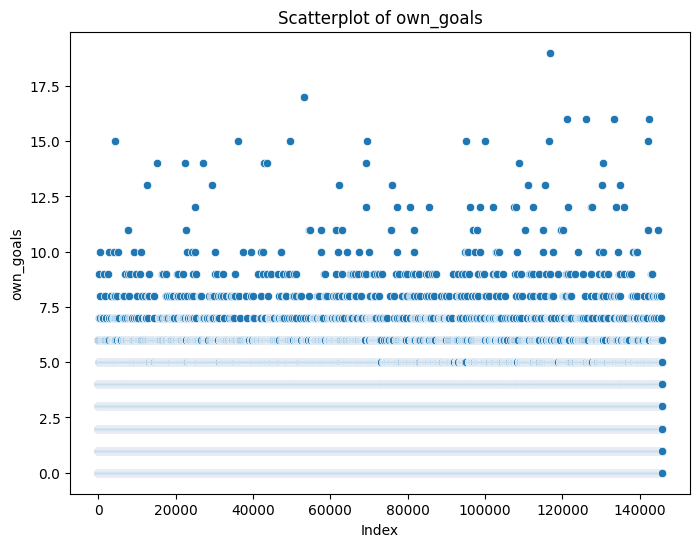

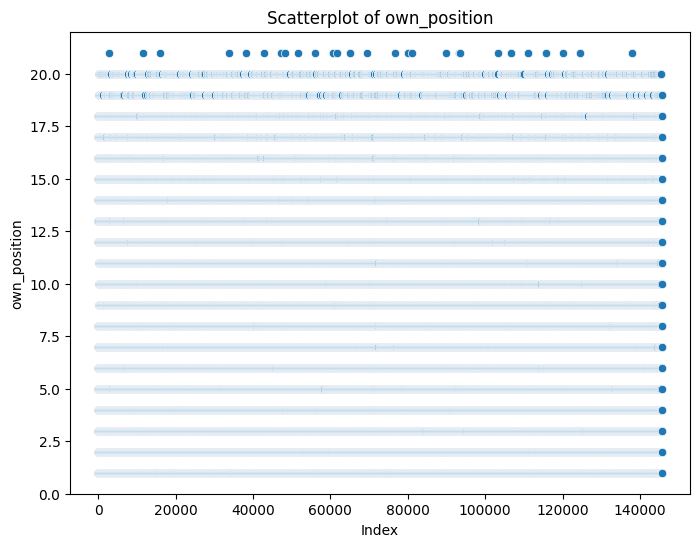


Skipping scatterplot for non-numeric column: own_manager_name


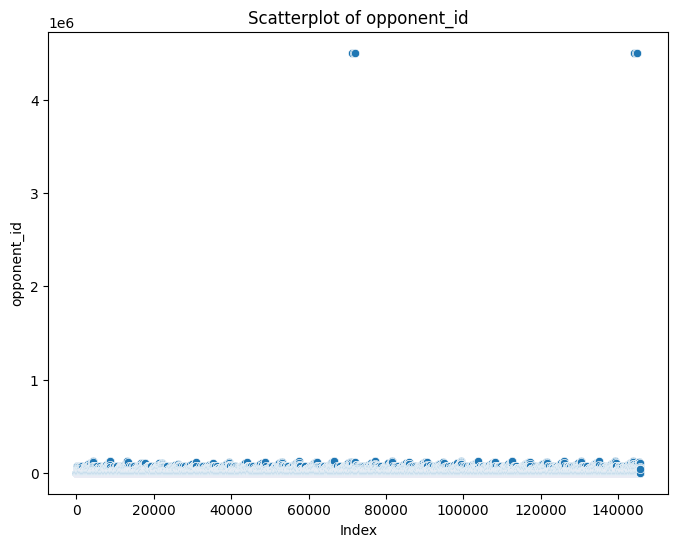

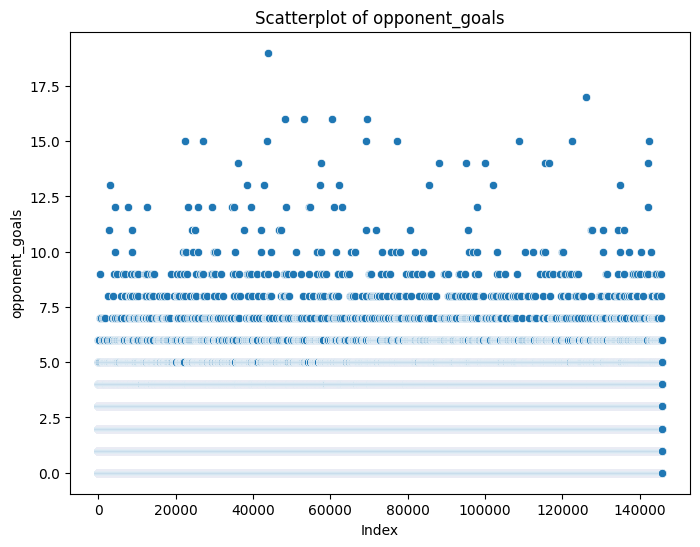

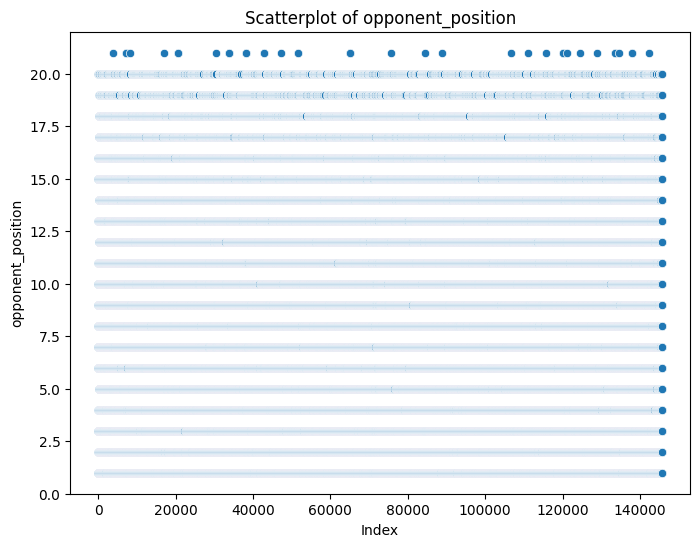


Skipping scatterplot for non-numeric column: opponent_manager_name
Skipping scatterplot for non-numeric column: hosting


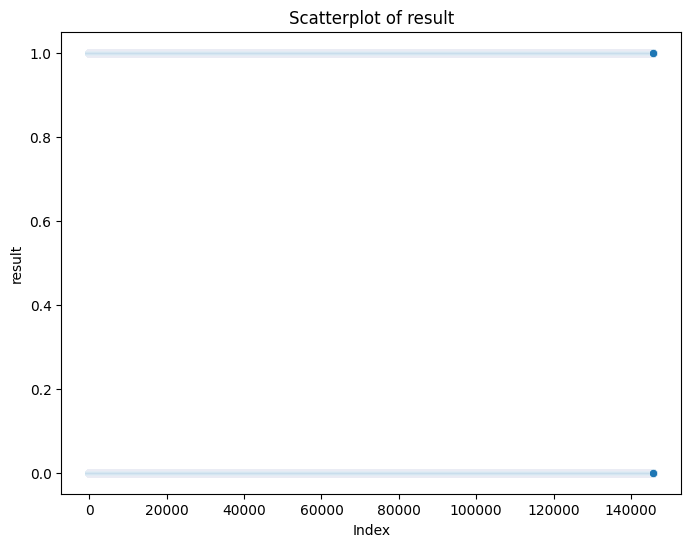

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df.index, y=col, data=df)
        plt.title(f'Scatterplot of {col}')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.show()
        print()
    else:
        print(f"Skipping scatterplot for non-numeric column: {col}")

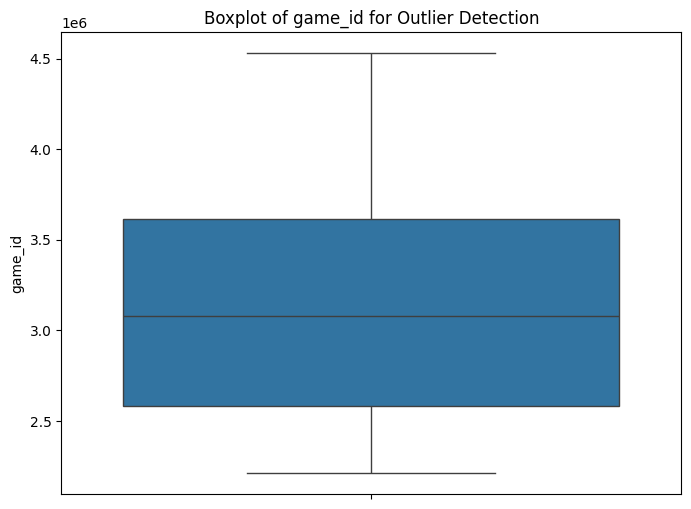

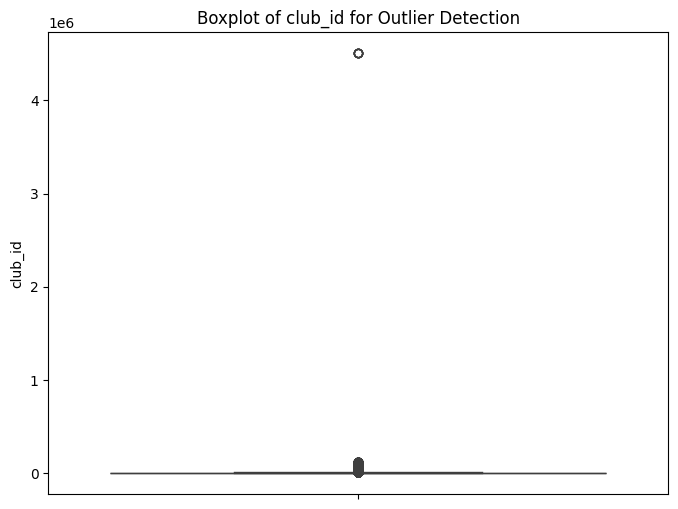

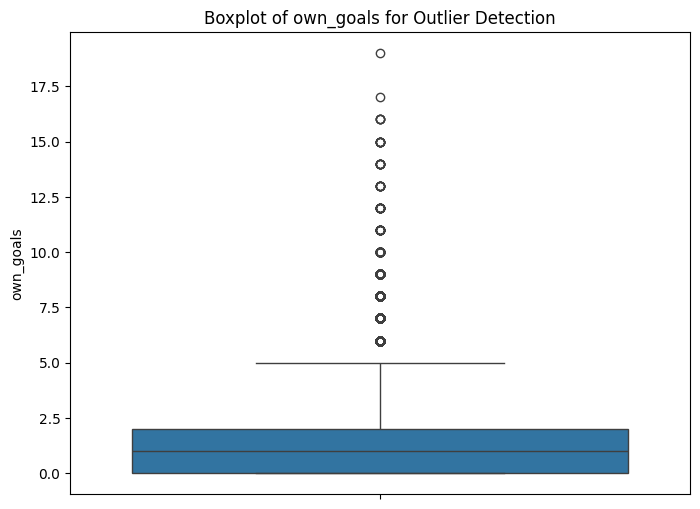

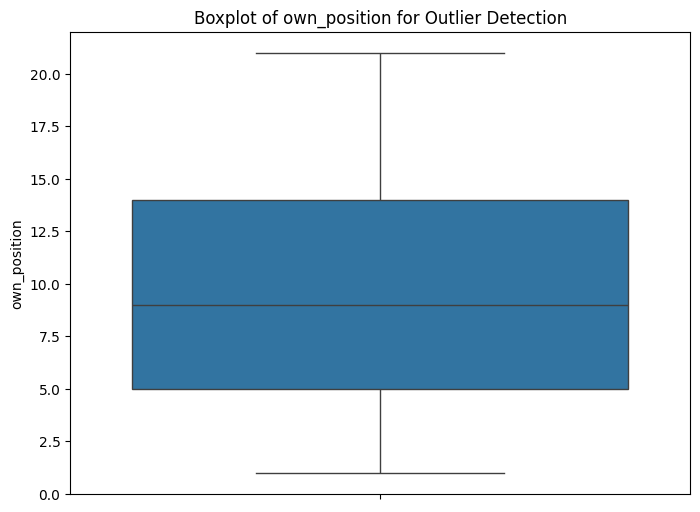

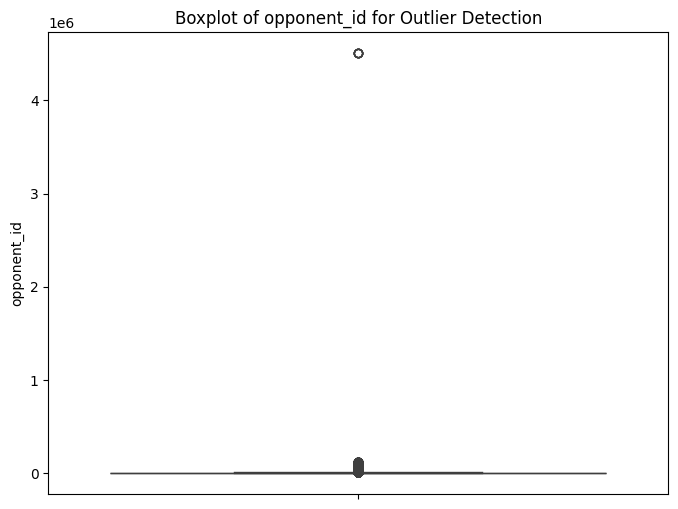

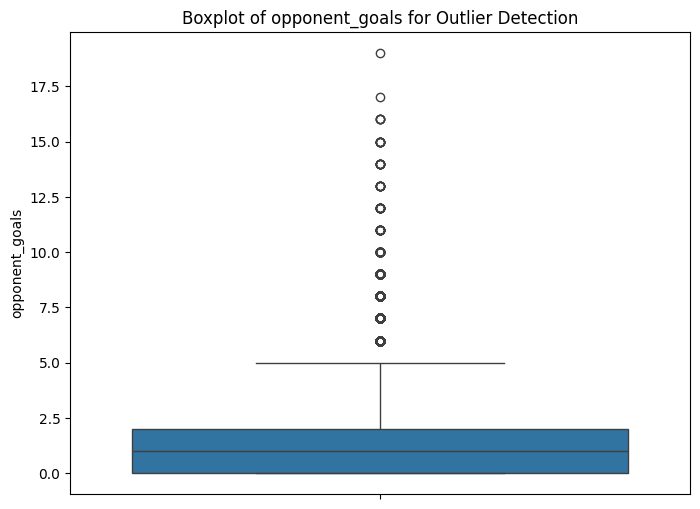

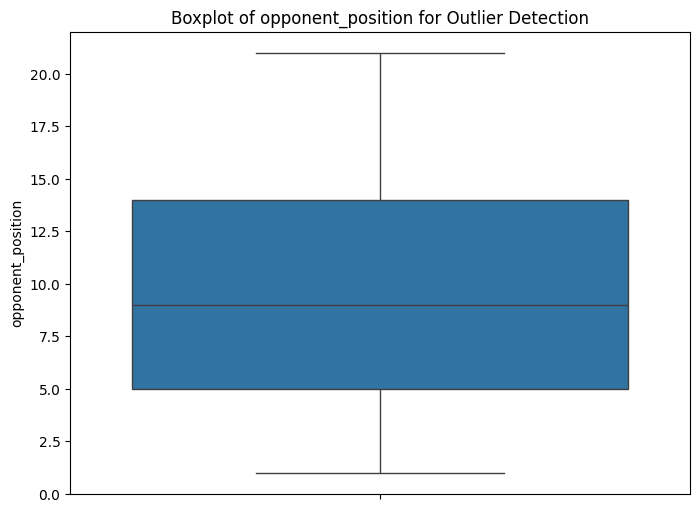

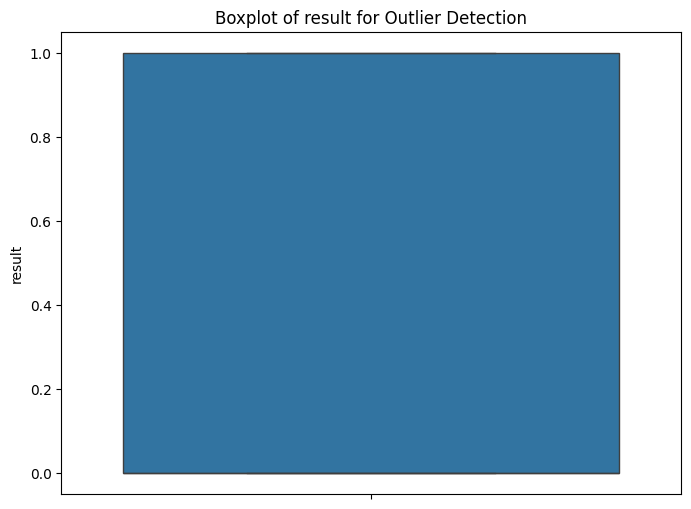

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=col, data=df)
        plt.title(f'Boxplot of {col} for Outlier Detection')
        plt.ylabel(col)
        plt.show()
        print()


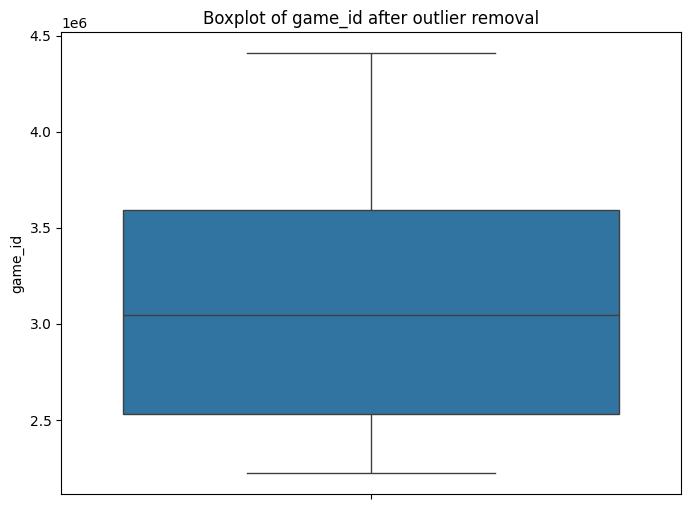

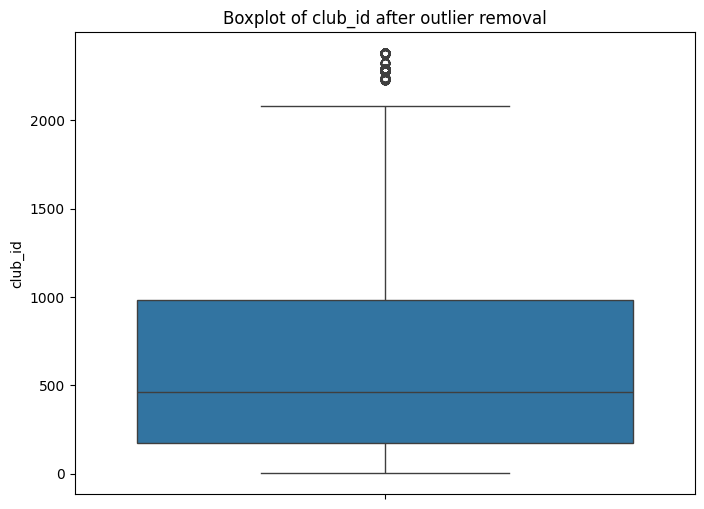

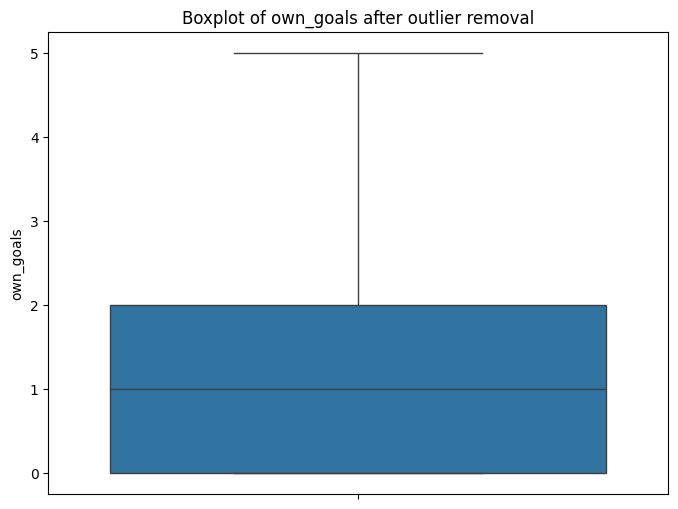

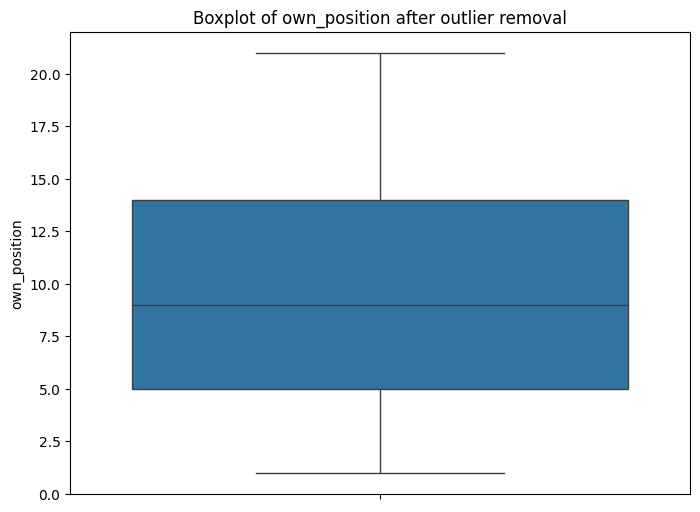

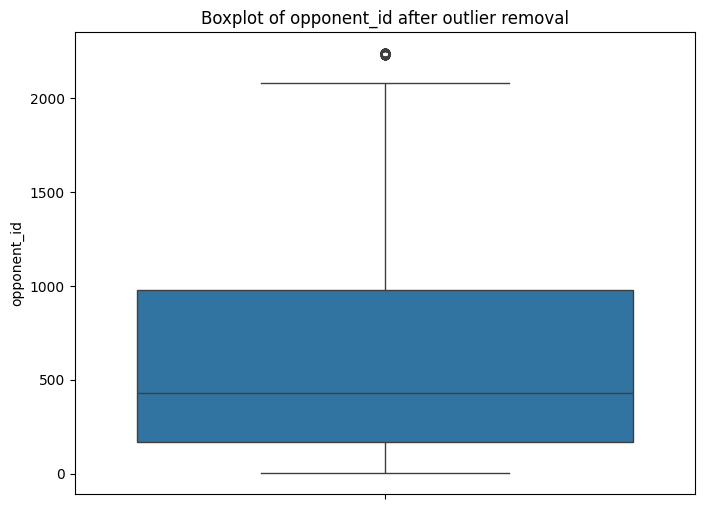

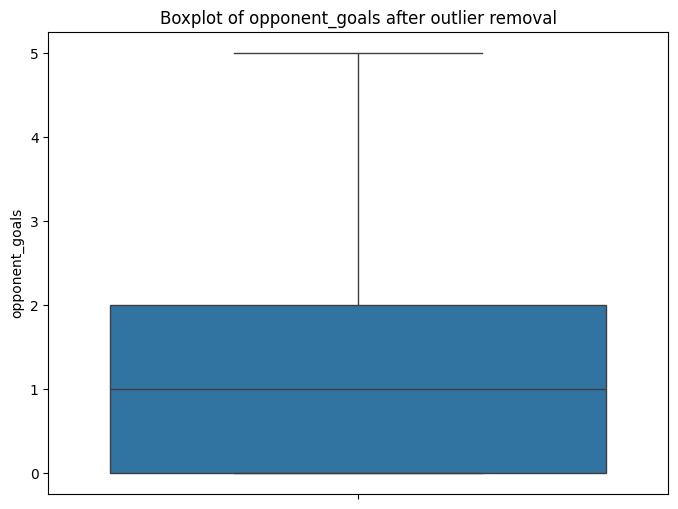

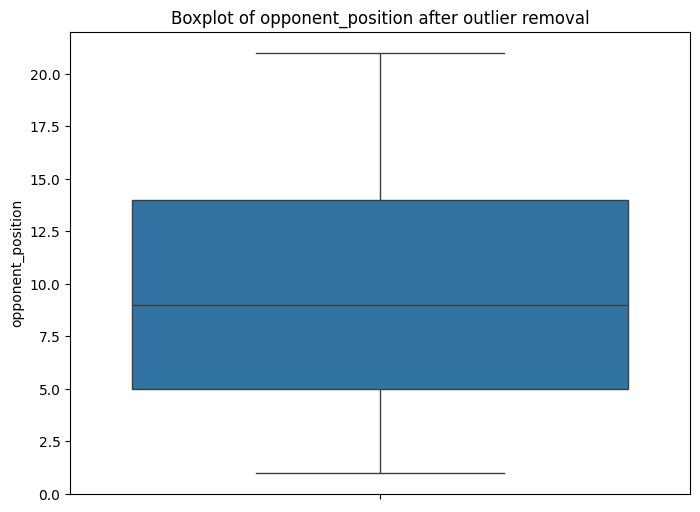

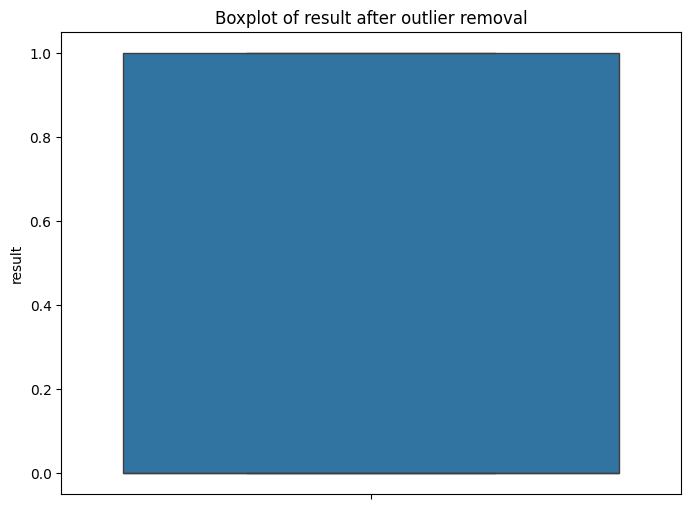

In [ ]:
# remove outliers for above boxplots and give graph again
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
    print(df_filtered)
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df = remove_outliers_iqr(df, col) # Remove outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=col, data=df)
        plt.title(f'Boxplot of {col} after outlier removal')
        plt.ylabel(col)
        plt.show()
        print()


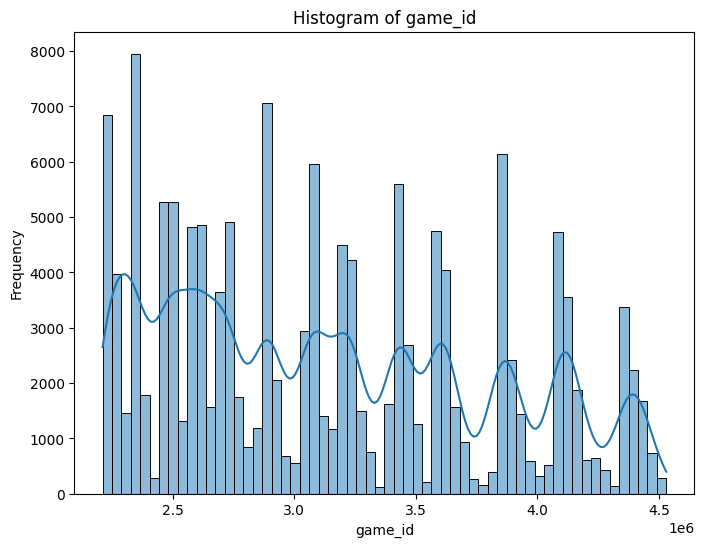

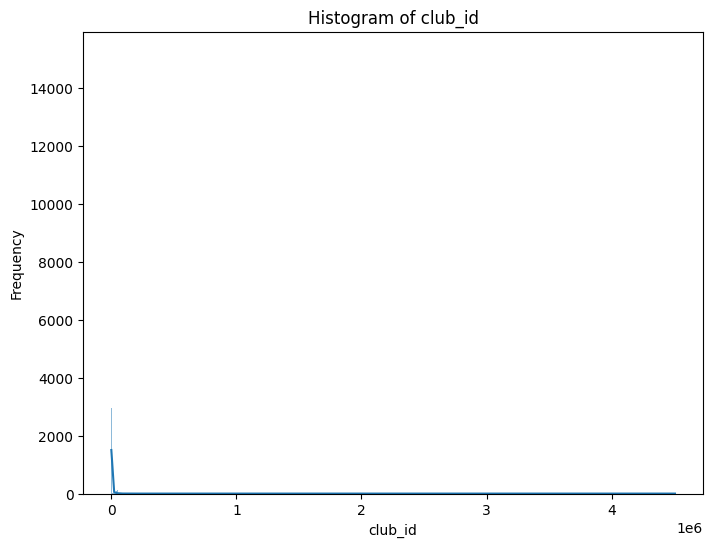

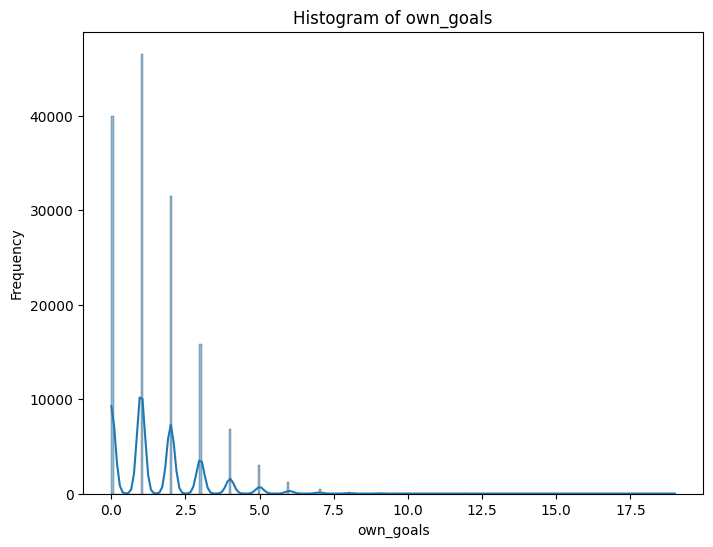

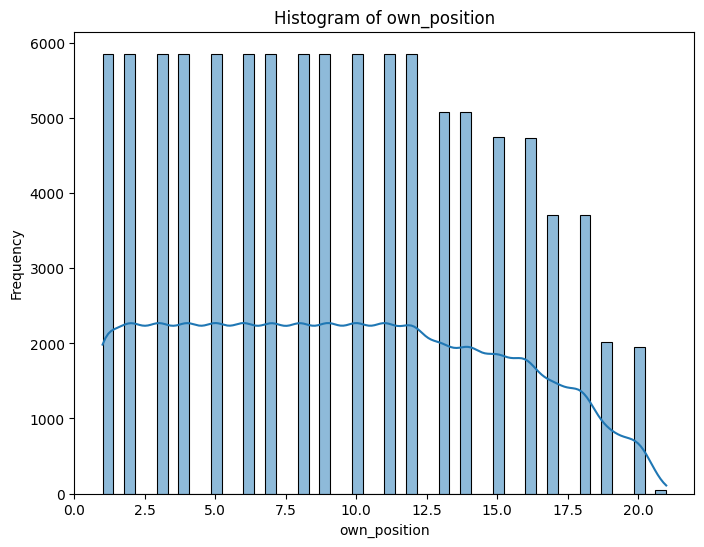


Skipping histogram for non-numeric column: own_manager_name


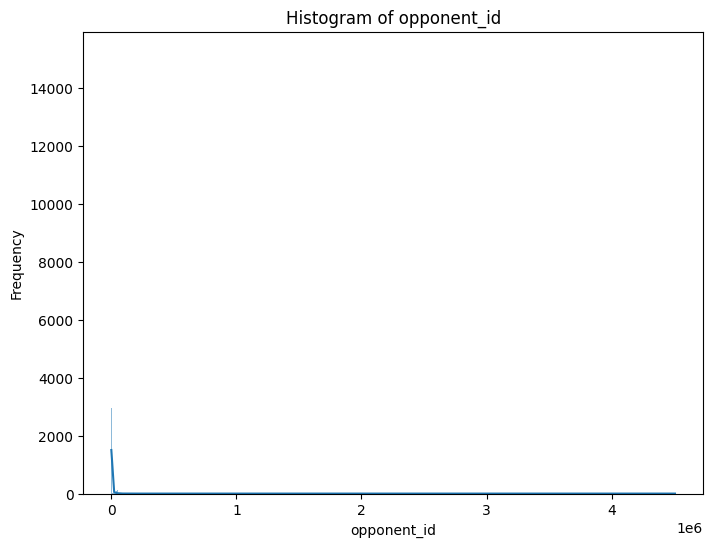

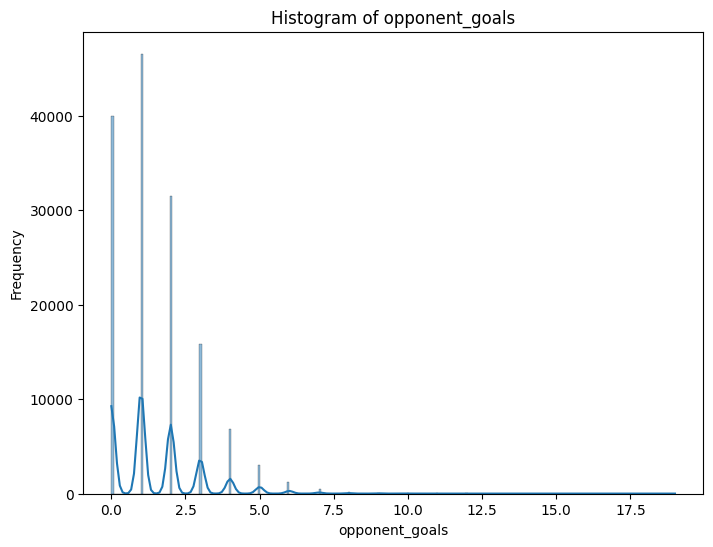

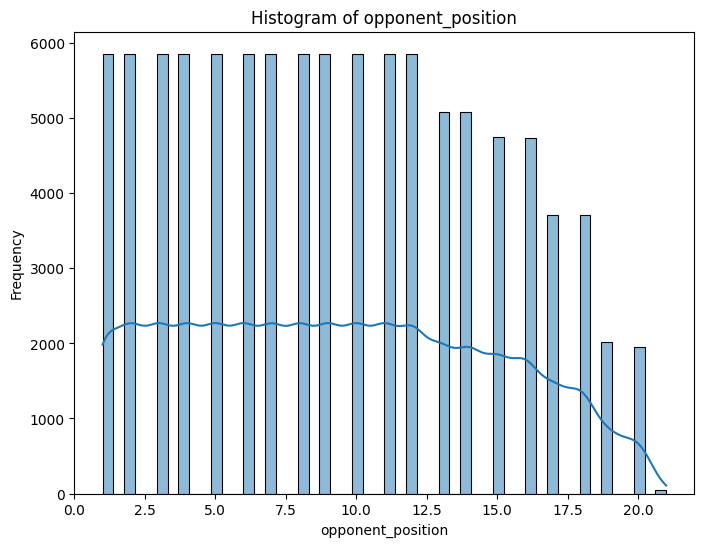


Skipping histogram for non-numeric column: opponent_manager_name
Skipping histogram for non-numeric column: hosting


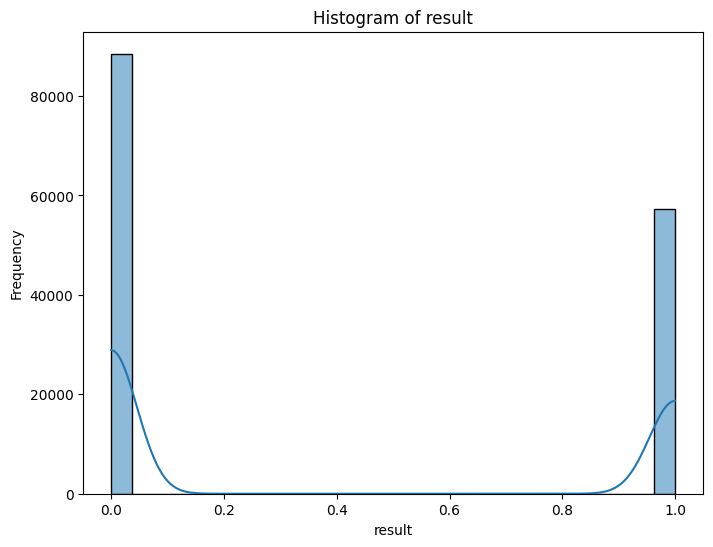

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        print()
    else:
        print(f"Skipping histogram for non-numeric column: {col}")


In [ ]:
# give skewness and krutosis for above dataset
import pandas as pd
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        skewness = df[col].skew()
        kurtosis = df[col].kurt()
        print(f"Column: {col}")
        print(f"Skewness: {skewness}")
        print(f"Kurtosis: {kurtosis}")
        print()


Column: game_id
Skewness: 0.4025011595450775
Kurtosis: -0.9930820793417299

Column: club_id
Skewness: 0.9845470658862265
Kurtosis: 0.9664027728528475

Column: own_goals
Skewness: 0.7893113508015968
Kurtosis: 0.17187923917892167

Column: own_position
Skewness: 0.15673519826236798
Kurtosis: -1.1149706121511365

Column: opponent_id
Skewness: 0.5571084303218169
Kurtosis: -0.6720703693161423

Column: opponent_goals
Skewness: 0.7900017648876522
Kurtosis: 0.17157736068625296

Column: opponent_position
Skewness: 0.1594740355190996
Kurtosis: -1.112292215802283

Column: result
Skewness: 0.5171954513800191
Kurtosis: -1.7325712642679956

